
# **Unveiling Emotions through Text: An NLP-based Approach**





# Introduction
Emotion Analysis using Natural Language Processing (NLP), aims to decipher the sentiment, mood, or emotional state expressed in written text.

The Emotions dataset is designed to facilitate research and exploration in natural language processing (NLP) and emotion analysis. It contains diverse text samples, each labeled with one of the six fundamental emotions it conveys.
Six categories:
sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5).


The purpose of this data is to construct and train a model capable of analyzing text samples to detect and categorize various emotions.

In [ ]:
# Importing Modules

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import collections

import contractions
import nlp_utils as nu

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string

In [ ]:
# NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## Data Preprocessing

In [ ]:
# Preprocessing the text

def preprocess_text(text):

  # Remove HTML tags
  text = re.sub(r'<[^>]+>', '', text)

  # Lowercasing
  text = text.lower()

  # Tokenization
  tokens = word_tokenize(text)

  # Removing Punctuation and Special Characters
  table = str.maketrans('', '', string.punctuation)
  tokens = [word.translate(table) for word in tokens]

  conm = contractions.CONTRACTION_MAP
  for key,value in conm.items():
    text = re.sub(r"\b" + re.escape(key) + r"\b", value, text)

  # Removing Stopwords
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words]

  # Stemming
  # stemmer = PorterStemmer()
  # tokens = [stemmer.stem(word) for word in tokens]

  # Lemmatization
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(word) for word in tokens]

  return ' '.join(tokens)

In [ ]:
# Load the Emotions dataset
df = pd.concat(map(pd.read_csv, ['training.csv', 'validation.csv', 'test.csv']), ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20000 non-null  object
 1   label   20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [ ]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
print("Number of samples per class:")
count = df["label"].value_counts()
labels = count.index
values = count.values
print(count)

Number of samples per class:
label
1    6761
0    5797
3    2709
4    2373
2    1641
5     719
Name: count, dtype: int64


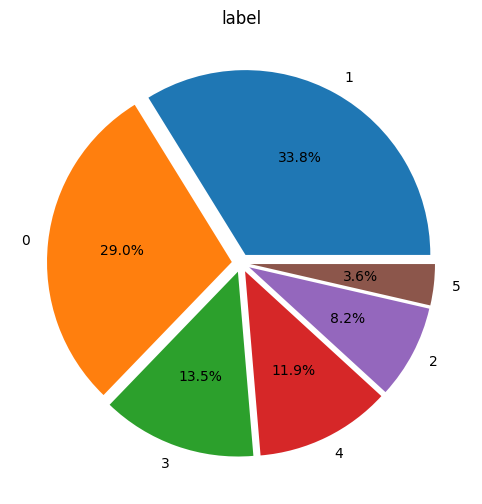

In [ ]:
plt.figure(figsize=(8,6))
plt.pie(values, labels=labels, autopct="%1.1f%%", explode=len(labels)*[0.05])
plt.title("label")
plt.show()

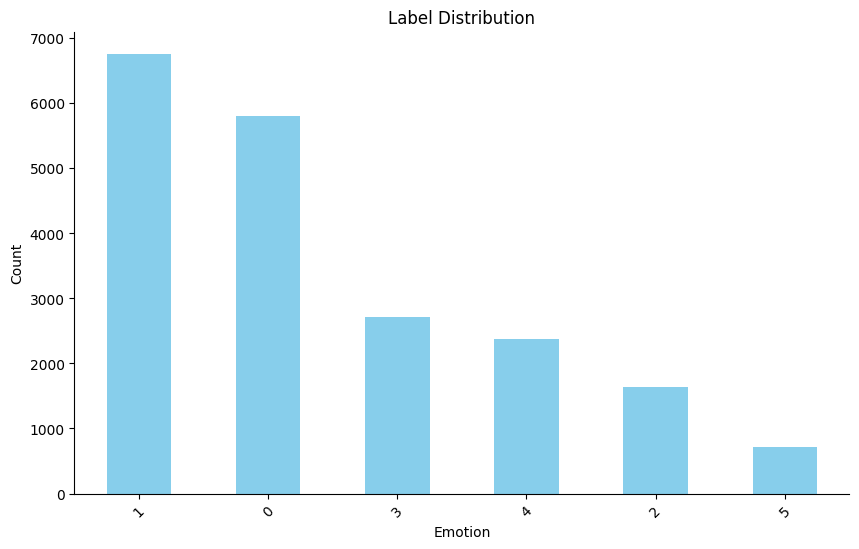

In [ ]:
label_counts = df['label'].value_counts()

plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Label Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


In [ ]:
df["Preprocessed Text"] = df["text"].apply(preprocess_text)

In [ ]:
df.head()

,text,label,Preprocessed Text
0,i didnt feel humiliated,0,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,0,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,3,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,2,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,3,feeling grouchy


Word Clouds: Create word clouds for each class/emotion to visually represent the most frequent words. This can give a quick overview of the most prominent terms associated with each emotion.

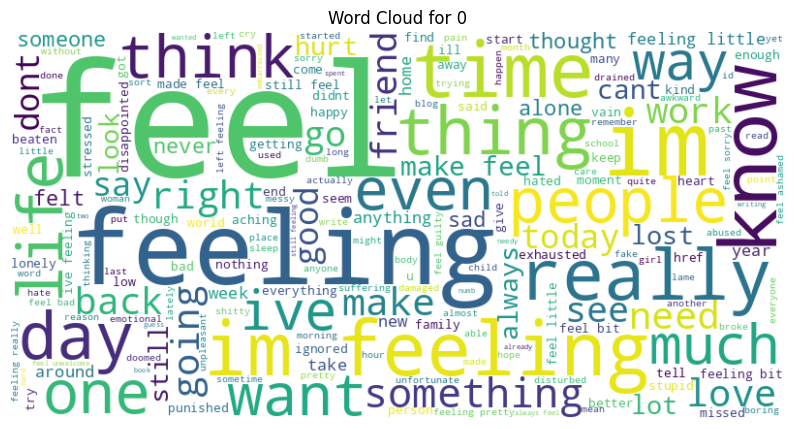

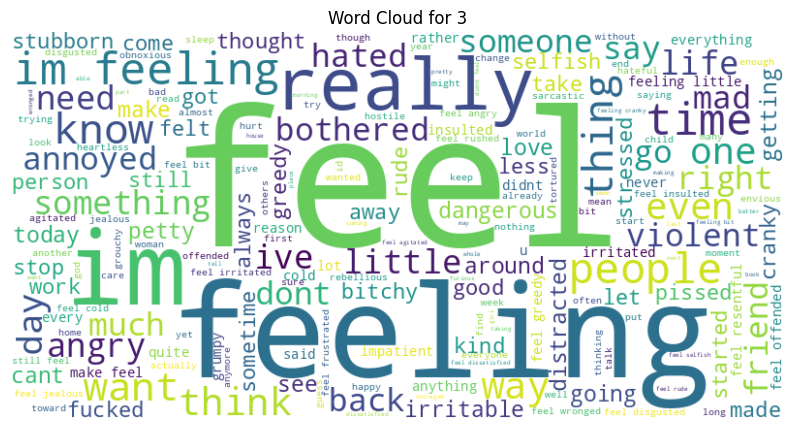

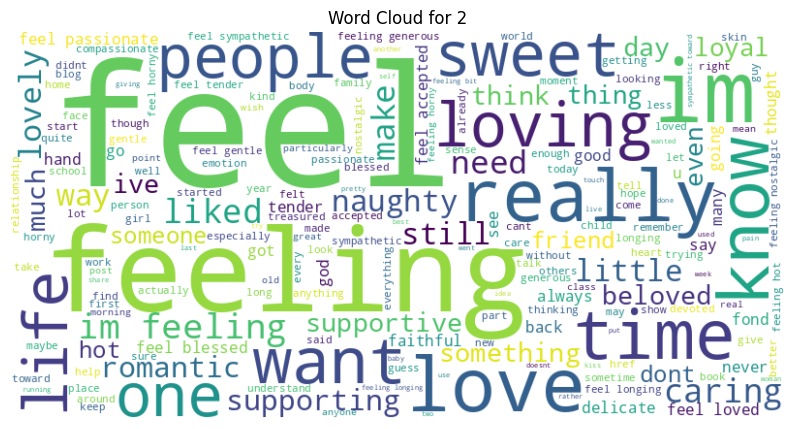

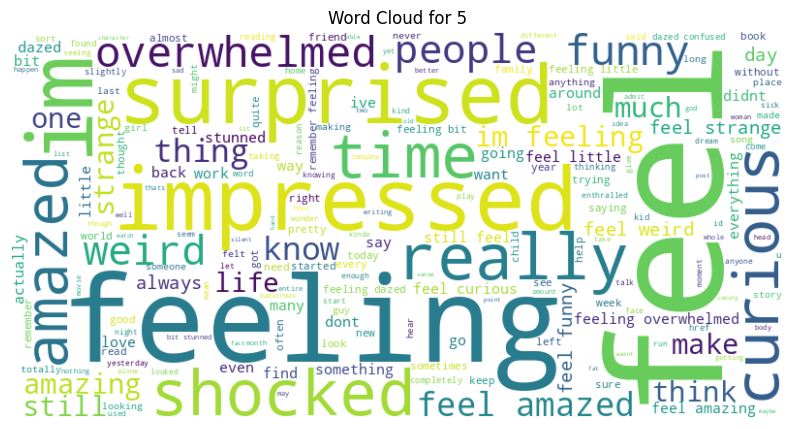

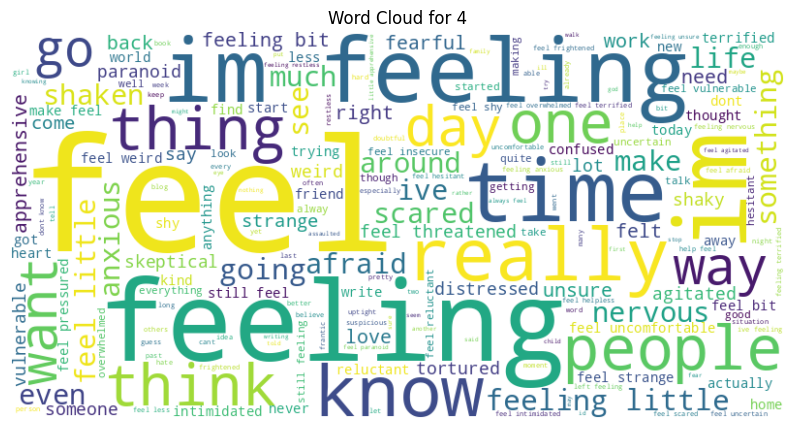

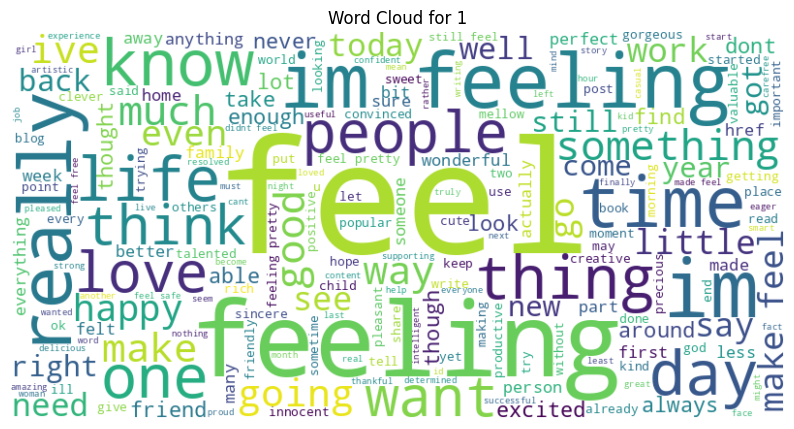

In [ ]:
from wordcloud import WordCloud

# Generate word clouds for each class
for emotion in df["label"].unique():
  text = " ".join(df[df["label"] == emotion]["Preprocessed Text"])
  if len(text) > 0:
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for {emotion}")
    plt.axis("off")
    plt.show()
  else:
    print(f"No words found for emotion: {emotion}")


N-gram Analysis: Investigate the distribution of n-grams (sequences of n words) within the text data. This can reveal important phrases or patterns specific to each emotion.

In [ ]:
from collections import Counter
from nltk.util import ngrams

# Function to generate n-grams for text
def generate_ngrams(text, n):
  tokens = word_tokenize(text)
  return list(ngrams(tokens, n))

# Example: Generate and count trigrams for each class
for emotion in df["label"].unique():
  text = " ".join(df[df["label"] == emotion]["Preprocessed Text"])
  trigrams = generate_ngrams(text, 5)
  trigram_counts = Counter(trigrams)
  print(f"Emotion: {emotion}")
  print(trigram_counts.most_common(10))
  print()


Emotion: 0
[(('feel', 'unwelcome', 'work', 'sometimes', 'think'), 3), (('unwelcome', 'work', 'sometimes', 'think', 'people'), 3), (('work', 'sometimes', 'think', 'people', 'might'), 3), (('sometimes', 'think', 'people', 'might', 'talking'), 3), (('life', 'like', 'game', 'sometimes', 'came'), 3), (('like', 'game', 'sometimes', 'came', 'around'), 3), (('game', 'sometimes', 'came', 'around', 'wall'), 3), (('nothing', 'surround', 'keep', 'fear', 'im'), 3), (('surround', 'keep', 'fear', 'im', 'unprotected'), 3), (('keep', 'fear', 'im', 'unprotected', 'see'), 3)]

Emotion: 3
[(('think', 'would', 'come', 'fast', 'would'), 2), (('would', 'come', 'fast', 'would', 'come'), 2), (('come', 'fast', 'would', 'come', 'suppose'), 2), (('fast', 'would', 'come', 'suppose', 'feel'), 2), (('would', 'come', 'suppose', 'feel', 'cranky'), 2), (('come', 'suppose', 'feel', 'cranky', 'today'), 2), (('feel', 'irritated', 'feel', 'like', 'im'), 2), (('attempt', 'convince', 'others', 'think', 'truly'), 2), (('convi

## Feature extraction




In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(df["Preprocessed Text"])
y = df["label"]

## Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=40)

In [ ]:
models = {
  "Logistic Regression": LogisticRegression(max_iter=1000),
  "Decision Tree": DecisionTreeClassifier(),
  "Random Forest": RandomForestClassifier(n_estimators=100),
  "K Nearest Neighbors": KNeighborsClassifier(),
  "SVM": SVC(kernel='linear'),
  "Naive-Bayes": MultinomialNB()
}

In [ ]:
for name, model in models.items():
  print(f"Training {name}...")
  model.fit(X_train, y_train)

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training K Nearest Neighbors...
Training SVM...
Training Naive-Bayes...


## Model Evaluation

In [ ]:
for name, model in models.items():
  y_pred = model.predict(X_test)
  print(f"Evaluation for {name}:")
  print("Accuracy: ", accuracy_score(y_test, y_pred))
  print("Precision: ", precision_score(y_test, y_pred, average=None))
  print("Recall: ", recall_score(y_test, y_pred, average=None))
  print("F1 Score: ", f1_score(y_test, y_pred, average=None))
  print("-" * 50)

Evaluation for Logistic Regression:
Accuracy:  0.85075
Precision:  [0.87398374 0.82182053 0.84306569 0.88274336 0.86543536 0.8362069 ]
Recall:  [0.90488215 0.93396919 0.67941176 0.78082192 0.73051225 0.65100671]
F1 Score:  [0.8891646  0.87431319 0.752443   0.82866044 0.79227053 0.73207547]
--------------------------------------------------
Evaluation for Decision Tree:
Accuracy:  0.817
Precision:  [0.8744626  0.83272194 0.72910663 0.79230769 0.75333333 0.7133758 ]
Recall:  [0.85606061 0.83272194 0.74411765 0.80626223 0.75501114 0.75167785]
F1 Score:  [0.86516376 0.83272194 0.73653566 0.79922405 0.7541713  0.73202614]
--------------------------------------------------
Evaluation for Random Forest:
Accuracy:  0.849
Precision:  [0.92144748 0.82652378 0.79672131 0.85773196 0.81690141 0.70253165]
Recall:  [0.87878788 0.90535583 0.71470588 0.81409002 0.77505568 0.74496644]
F1 Score:  [0.89961224 0.86414566 0.75348837 0.83534137 0.79542857 0.72312704]
-----------------------------------------

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid for each classifier
param_grids = {
  "Logistic Regression": {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
  "Decision Tree": {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10]},
  "Random Forest": {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]},
  "K Nearest Neighbors": {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
  "SVM": {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']},
  "Naive Bayes": {}
}

In [ ]:
# Perform grid search for each classifier
best_models = {}
for name, classifier in models.items():
  print(f"Performing grid search for {name}...")
  param_grid = param_grids.get(name, {})
  grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X_train, y_train)
  best_model = grid_search.best_estimator_
  best_models[name] = best_model
  print(f"Best hyperparameters for {name}: {grid_search.best_params_}")
  print(f"Best cross-validation accuracy: {grid_search.best_score_}")
  print("-" * 50)

Performing grid search for Logistic Regression...
Best hyperparameters for Logistic Regression: {'C': 10}
Best cross-validation accuracy: 0.8534374999999998
--------------------------------------------------
Performing grid search for Decision Tree...
Best hyperparameters for Decision Tree: {'max_depth': None, 'min_samples_split': 10}
Best cross-validation accuracy: 0.8195
--------------------------------------------------
Performing grid search for Random Forest...
Best hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation accuracy: 0.8534375000000001
--------------------------------------------------
Performing grid search for K Nearest Neighbors...
Best hyperparameters for K Nearest Neighbors: {'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation accuracy: 0.5531875
--------------------------------------------------
Performing grid search for SVM...
Best hyperparameters for SVM: {'C': 1, 'kernel': 'linear'

In [ ]:
# Evaluate the best models on the test set
for name, model in best_models.items():
  print(f"Evaluating best model for {name} on the test set...")
  y_pred = model.predict(X_test)
  print(f"Evaluation for {name}:")
  print("Accuracy: ", accuracy_score(y_test, y_pred))
  print("Precision: ", precision_score(y_test, y_pred, average=None))
  print("Recall: ", recall_score(y_test, y_pred, average=None))
  print("F1 Score: ", f1_score(y_test, y_pred, average=None))
  print("-" * 50)

Evaluating best model for Logistic Regression on the test set...
Evaluation for Logistic Regression:
Accuracy:  0.8565
Precision:  [0.8977368  0.85547945 0.80528053 0.82539683 0.85532995 0.74657534]
Recall:  [0.90151515 0.91636097 0.71764706 0.81409002 0.75055679 0.73154362]
F1 Score:  [0.89962201 0.88487425 0.75894246 0.81970443 0.7995255  0.73898305]
--------------------------------------------------
Evaluating best model for Decision Tree on the test set...
Evaluation for Decision Tree:
Accuracy:  0.82125
Precision:  [0.86475063 0.82783357 0.76687117 0.79844961 0.79376499 0.70121951]
Recall:  [0.86111111 0.84666178 0.73529412 0.80626223 0.73719376 0.77181208]
F1 Score:  [0.86292704 0.83714182 0.75075075 0.8023369  0.76443418 0.73482428]
--------------------------------------------------
Evaluating best model for Random Forest on the test set...
Evaluation for Random Forest:
Accuracy:  0.8475
Precision:  [0.9182058  0.82728495 0.79738562 0.85245902 0.81472684 0.7       ]
Recall:  [0.

# Multilayer Perceptron (MLP)

In [ ]:
!pip install tensorflow
!pip install -q keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Encode labels
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [ ]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(encoder.classes_), activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train.toarray(), y_train_encoded, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.4798 - loss: 1.3367 - val_accuracy: 0.8475 - val_loss: 0.4395
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8734 - loss: 0.3745 - val_accuracy: 0.8556 - val_loss: 0.4035
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9108 - loss: 0.2696 - val_accuracy: 0.8494 - val_loss: 0.4249
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9269 - loss: 0.2049 - val_accuracy: 0.8419 - val_loss: 0.4632
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9495 - loss: 0.1471 - val_accuracy: 0.8475 - val_loss: 0.4977
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9552 - loss: 0.1230 - val_accuracy: 0.8438 - val_loss: 0.5418
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9646 - loss: 0.1049 - val_accuracy: 0.8494 - val_loss: 0.5638
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9722 - loss: 0.0823 - val_accur

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred_probabilities = model.predict(X_test.toarray())
y_pred_nn = np.argmax(y_pred_probabilities, axis=-1)

print("Evaluation for Multilayer Perceptron:")
print(classification_report(y_test_encoded, y_pred_nn))


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Evaluation for Multilayer Perceptron:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1188
           1       0.87      0.89      0.88      1363
           2       0.75      0.72      0.73       340
           3       0.75      0.84      0.79       511
           4       0.83      0.73      0.78       449
           5       0.68      0.83      0.75       149

    accuracy                           0.84      4000
   macro avg       0.80      0.81      0.80      4000
weighted avg       0.84      0.84      0.84      4000



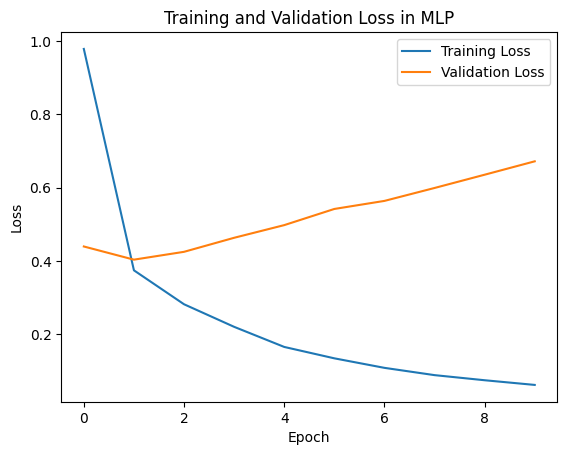

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss in MLP')
plt.legend()
plt.show()


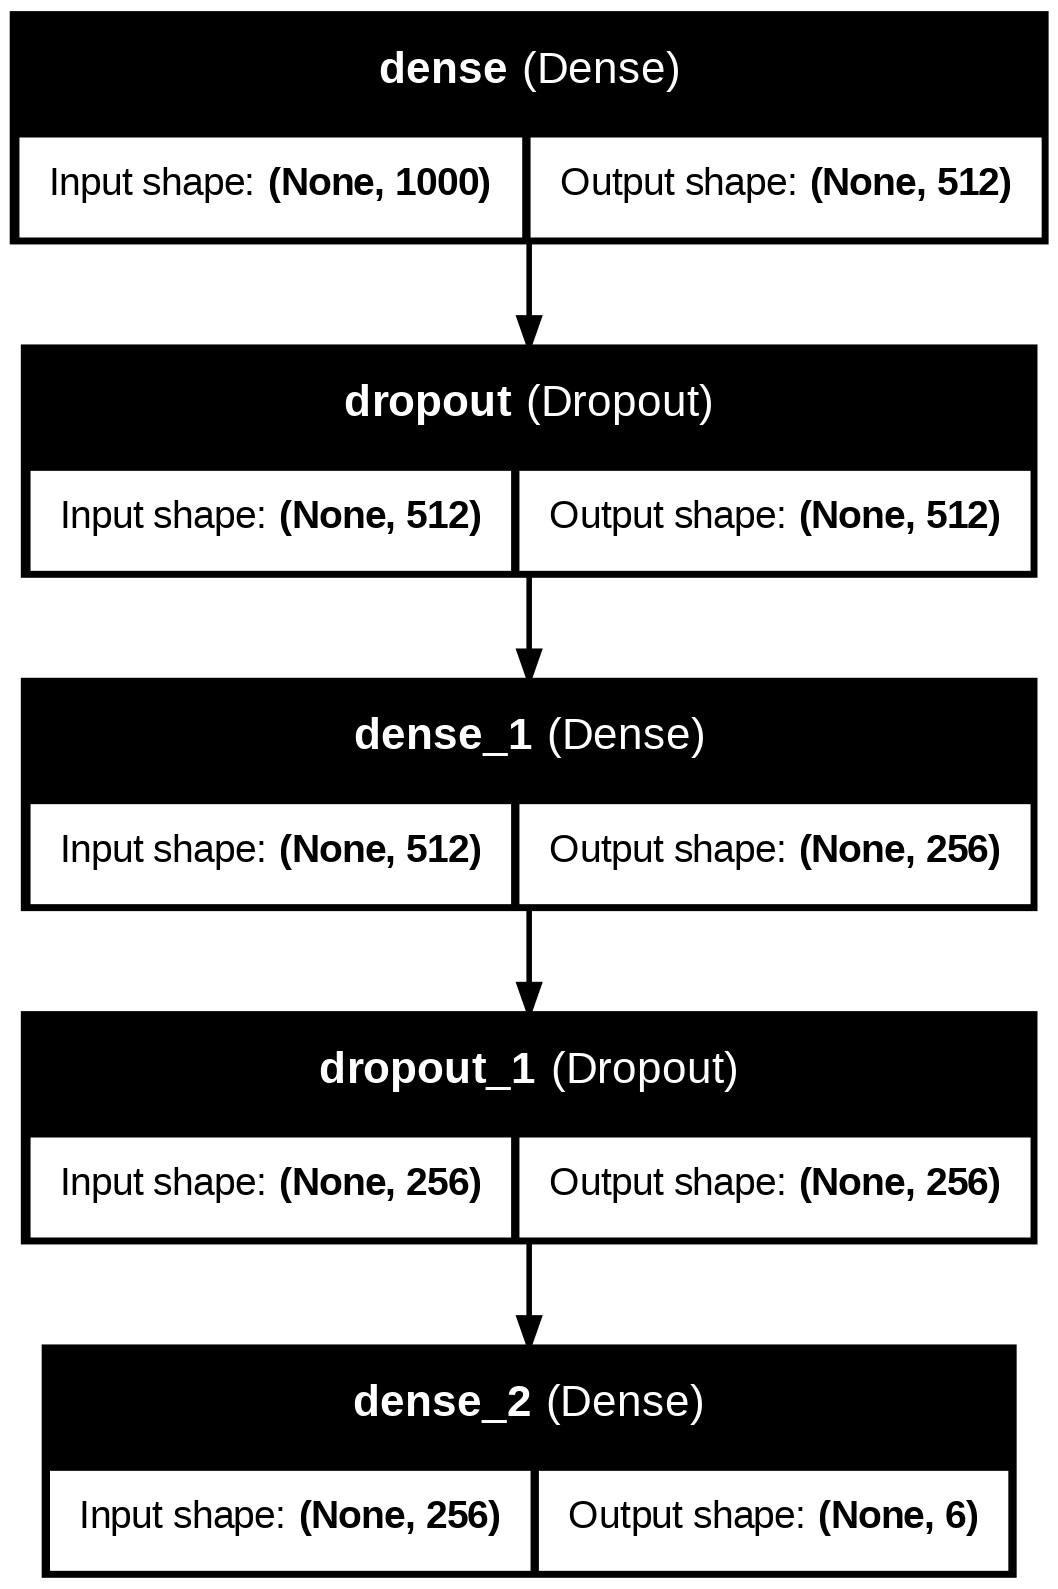

In [ ]:
plot_model(model, to_file='neural_network.png', show_shapes=True, show_layer_names=True)

# Recurrent Neural Network (RNN) with LSTM

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# Tokenize text and convert it into sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["Preprocessed Text"])
sequences = tokenizer.texts_to_sequences(df["Preprocessed Text"])

In [ ]:
import joblib

joblib.dump(tokenizer, 'tokenizer.pkl')

['tokenizer.pkl']

In [32]:
# Pad sequences to ensure uniform length
max_sequence_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

In [33]:
# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df["label"])

In [34]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)

In [35]:
# Define LSTM model
embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1

In [36]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))  # 6 output classes for 6 fundamental emotions

In [37]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 113ms/step - accuracy: 0.3960 - loss: 1.5057 - val_accuracy: 0.8328 - val_loss: 0.5589
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 109ms/step - accuracy: 0.8863 - loss: 0.3753 - val_accuracy: 0.9147 - val_loss: 0.2411
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 102ms/step - accuracy: 0.9567 - loss: 0.1226 - val_accuracy: 0.9165 - val_loss: 0.2291
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 96ms/step - accuracy: 0.9773 - loss: 0.0685 - val_accuracy: 0.9200 - val_loss: 0.2302
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 93ms/step - accuracy: 0.9859 - loss: 0.0480 - val_accuracy: 0.9168 - val_loss: 0.2549
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - accuracy: 0.9858 - loss: 0.0402 - val_accuracy: 0.9175 - val_loss: 0.2702
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.9885 - loss: 0.0346 - val_accuracy: 0.9165 - val_loss: 0.2913
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - accuracy: 0.9912 - loss: 0.0270

In [39]:
from sklearn.metrics import classification_report
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print(f'Test Accuracy: {accuracy}')


125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9164 - loss: 0.3075
Test Loss: 0.3172875642776489
Test Accuracy: 0.9132500290870667


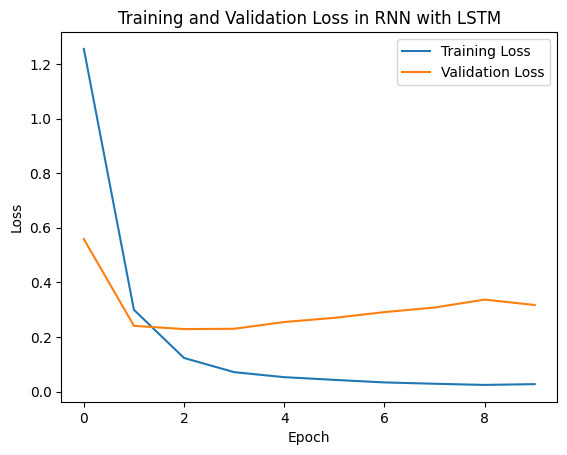

In [40]:
# Plot epoch vs loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss in RNN with LSTM')
plt.legend()
plt.show()


In [41]:
from tensorflow.keras.utils import plot_model

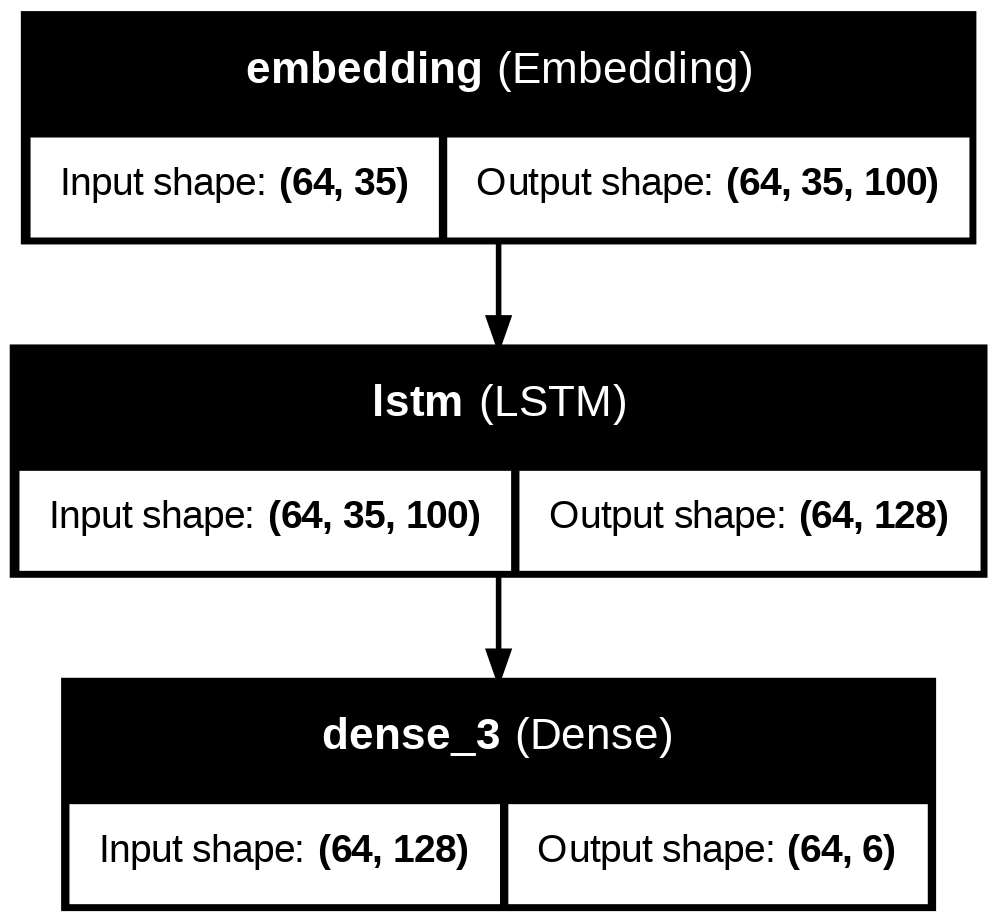

In [42]:
plot_model(model, to_file='rnn_with_lstm.png', show_shapes=True, show_layer_names=True)

In [43]:
import joblib

# Save the model
joblib.dump(model, "emotion_classifier_model.pkl")


['emotion_classifier_model.pkl']